In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [117]:
df = pd.read_csv('clean_df.csv', index_col=0)
df.head()

,year,name,age,games_played,games_started,minutes_played,PER,TS%,3PAr,FTr,...,college_Western Kentucky University,college_Western Michigan University,college_Wichita State University,college_William Paterson University,college_Wingate University,college_Winston-Salem State University,college_Wright State University,college_Xavier University,college_Xavier University of Louisiana,college_Yale University
0,1974,Zaid Abdul-Aziz,27.0,79,50,2459.0,15.9,0.516,0.0,0.328,...,0,0,0,0,0,0,0,0,0,0
1,1974,Kareem Abdul-Jabbar,26.0,81,72,3548.0,24.4,0.564,0.0,0.239,...,0,0,0,0,0,0,0,0,0,0
2,1974,Don Adams,26.0,74,46,2298.0,10.9,0.457,0.0,0.271,...,0,0,0,0,0,0,0,0,0,0
3,1974,Rick Adelman,27.0,55,12,618.0,10.0,0.447,0.0,0.447,...,0,0,0,0,0,0,0,0,0,0
4,1974,Lucius Allen,26.0,72,48,2388.0,18.8,0.536,0.0,0.258,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20529 entries, 0 to 20758
Columns: 619 entries, year to college_Yale University
dtypes: float64(44), int64(574), object(1)
memory usage: 97.1+ MB


In [119]:
# 1. Load data
X = df.drop(columns=['hall_of_fame', 'name', 'year'])
y = df['hall_of_fame']

# 2. Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 3. Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KBest and Logistic Regression

In [120]:
my_KBest = SelectKBest(f_classif, k=30).fit(X_train, y_train)
X_train_selected = my_KBest.transform(X_train)
X_test_selected = my_KBest.transform(X_test)
my_KBest.get_support()

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 75  89 163 255 278 301 363 371 449 502 577 597] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

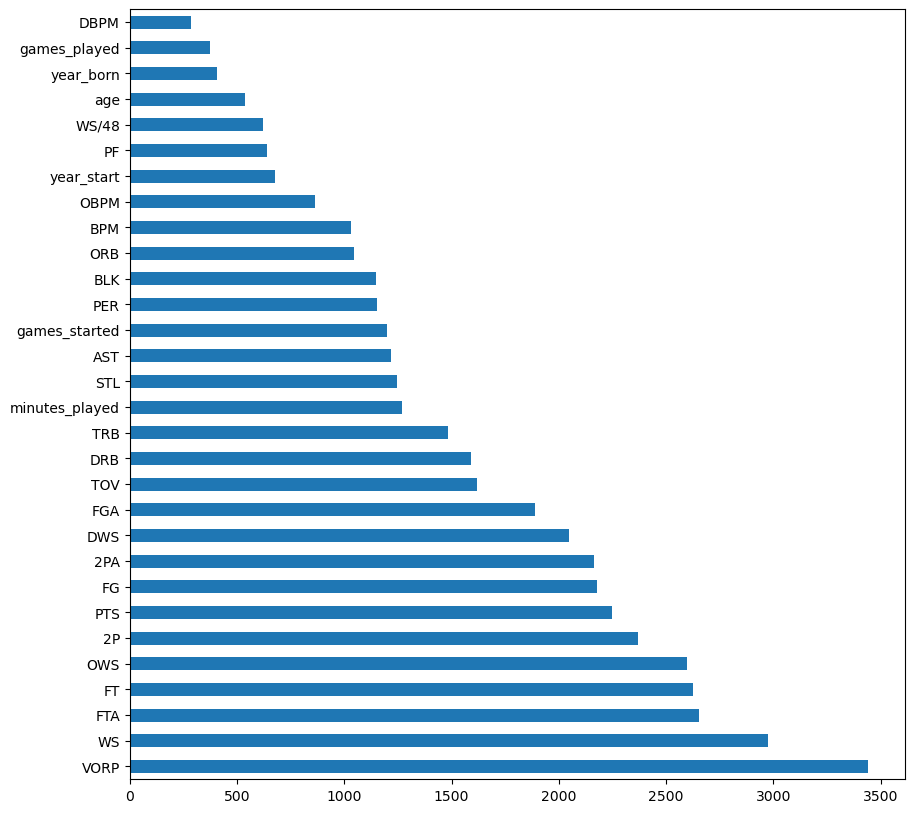

In [122]:
pd.Series(index=X.columns, data=my_KBest.scores_).sort_values(ascending=False).head(30).plot(kind='barh', figsize=(10,10))
plt.show()

In [7]:
train_acc = []
test_acc = []

for k in range(1, 100):
    my_KBest = SelectKBest(r_regression, k=k).fit(X_train, y_train)
    
    X_train_selected = my_KBest.transform(X_train)
    X_test_selected = my_KBest.transform(X_test)
    
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_selected, y_train)
    
    train_acc.append(model.score(X_train_selected, y_train))
    test_acc.append(model.score(X_test_selected, y_test))

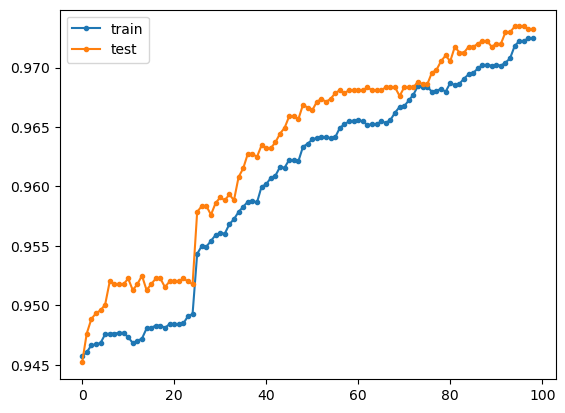

In [8]:
plt.figure()
plt.plot(train_acc, label='train', marker='.')
plt.plot(test_acc, label='test', marker='.')
plt.legend()
plt.show()

In [9]:
my_KBest = SelectKBest(score_func=r_regression, k=26).fit(X_train, y_train)
    
X_train_selected = my_KBest.transform(X_train)
X_test_selected = my_KBest.transform(X_test)
    
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)

print(model.score(X_test_selected, y_test))

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9578665367754505
0.9870920603994154


In [10]:
df.groupby('name')['hall_of_fame'].mean().mean()

0.03208213025344883

This shows me that about 3.2% of players in my dataset are in the Hall of Fame. This means that 96.8% of players are not in the Hall of Fame. Therefore, scoring a 95.7% is not good. We will try using different pre-processing techniques to find a better solution.

There seems to be a jump in performance at 26 features. Even though we could reasonably go lower, to prevent overfitting, we will stick with 26 features.

In [11]:
my_KBest.scores_

array([ 1.77687412e-01,  1.49529843e-01,  2.61002348e-01,  2.67656515e-01,
        2.56275403e-01,  1.17808951e-01, -7.21881387e-02,  6.10537615e-02,
        1.92666633e-02,  8.51557480e-02,  6.88402033e-02,  1.28276485e-01,
        3.24179746e-02,  6.40357517e-02,  3.69431649e-01,  3.32952093e-01,
        3.91535637e-01,  1.90650639e-01,  2.23382741e-01,  1.30845094e-01,
        2.42948611e-01,  4.16168319e-01,  3.42260173e-01,  3.21223696e-01,
        1.15522756e-01,  4.40886041e-02,  4.74849335e-02, -3.53654713e-03,
        3.55149497e-01,  3.41277545e-01,  9.84158588e-02,  9.46128321e-02,
        3.71137732e-01,  3.72839490e-01,  7.93059867e-02,  2.44538065e-01,
        2.97320130e-01,  2.87915525e-01,  2.62969893e-01,  2.65307608e-01,
        2.55581183e-01,  2.99499542e-01,  1.93342469e-01,  3.46843372e-01,
        5.61310880e-02,  2.01557002e-02, -1.55039404e-01, -1.99315997e-01,
       -8.62851480e-02, -8.28267612e-03,  3.80102222e-02,  9.18890151e-03,
       -5.79565974e-03,  

## PCA and Logistic Regression

In [12]:
train_acc = []
test_acc = []

for compos in range(1, 100):
    my_pca = PCA(n_components=compos).fit(X_train, y_train)
    
    X_train_selected = my_pca.transform(X_train)
    X_test_selected = my_pca.transform(X_test)
    
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_selected, y_train)
    
    train_acc.append(model.score(X_train_selected, y_train))
    test_acc.append(model.score(X_test_selected, y_test))

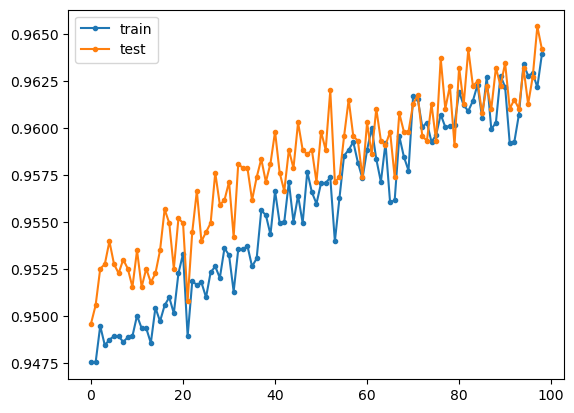

In [13]:
plt.figure()
plt.plot(train_acc, label='train', marker='.')
plt.plot(test_acc, label='test', marker='.')
plt.legend()
plt.show()

17 and 46 seem to be our best bets. 17 has less features but 46 is a big difference between test and train sets.

In [15]:
my_pca = PCA(n_components=17).fit(X_train, y_train)
    
X_train_selected = my_pca.transform(X_train)
X_test_selected = my_pca.transform(X_test)
    
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)
    
print(model.score(X_train_selected, y_train))
print(model.score(X_test_selected, y_test))

0.949826462887414
0.9544568923526546


We score about a 96% on this. A bit better using PCA instead of SelectKBest.

## Pipeline and Grid Searching

In [124]:
criteria = df['year_end'] <= 2012

testing_df = df.loc[criteria, :]

X = testing_df.drop(columns=['hall_of_fame', 'name'])
y = testing_df['hall_of_fame']

In [125]:
testing_df.groupby('name')['hall_of_fame'].mean().mean()

0.038910505836575876

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [91]:
estimators = [('scaler', StandardScaler()),
             ('reduce_dim', PCA()),
             ('model', LogisticRegression())]

pipe = Pipeline(estimators)

In [100]:
params = [
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [PCA()],
     'reduce_dim__n_components': range(20, 31),
     'model': [LogisticRegression()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }, 
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [SelectKBest()],
     'reduce_dim__k': range(20, 31),
     'model': [LogisticRegression()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [PCA()],
     'reduce_dim__n_components': range(20, 31),
     'model': [DecisionTreeClassifier()],
     'model__max_depth': range(2, 7)
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [SelectKBest()],
     'reduce_dim__k': range(20, 31),
     'model': [DecisionTreeClassifier()],
     'model__max_depth': range(2, 7)
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [PCA()],
     'reduce_dim__n_components': range(20, 31),
     'model': [SVC()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'model__kernel': ['rbf', 'poly']
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [SelectKBest()],
     'reduce_dim__k': range(20, 31),
     'model': [SVC()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'model__kernel': ['rbf', 'poly']
    }
]

In [101]:
grid = GridSearchCV(pipe, params, cv=5)
fittedgrid = grid.fit(X_train, y_train)

fittedgrid.best_params_

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_featu

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 298 302 318 320 326 341 352 365 366 372
 379 385 394 425 429 436 463 503 554 563 566 578 580 587 592 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 352 365 366 379 388 411 414 429
 436 452 455 463 466 473 503 528 554 558 563 566 569 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 27

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 264 267 274 275
 276 277 278 279 295 298 318 320 337 341 352 364 365 366 379 403 412 429
 436 463 503 554 563 566 578 580 587 598 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  83  86  90  91  92 103 104 107 110 114 117
 131 148 157 162 163 168 173 191 192 197 201 207 227 245 252 264 267 274
 275 276 277 283 288 290 295 297 29

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 103 104 107 110 114 117 131 148
 157 162 163 168 173 191 192 197 201 207 227 252 257 262 264 267 274 275
 276 277 295 298 318 320 341 349 352 365 366 379 405 410 429 436 444 463
 503 533 554 563 566 578 580 587 604 605] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  72  76  82  86  90  92 103 104 107 110 114 117 131
 148 155 157 162 163 168 173 182 191 192 197 201 207 227 252 264 267 274
 275 276 277 284 291 295 298 318 320 341 35

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  65  67  76  78  82  86  90  92 103 104 107 110 114 116
 117 131 139 148 157 162 163 168 173 191 192 197 201 207 227 252 256 264
 266 267 274 275 276 277 295 296 298 318 320 327 334 341 352 365 366 379
 387 392 417 429 431 436 450 453 463 479 483 503 520 522 554 563 566 578
 580 587 596 604 605 616] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 53  58  60  63  67  76  82  86  90  92 102 103 104 107 110 114 117 131
 148 157 162 163 168 173 175 191 192 197 201 207 227 252 26

{'model': SVC(C=1000),
 'model__C': 1000,
 'model__kernel': 'rbf',
 'reduce_dim': PCA(n_components=30),
 'reduce_dim__n_components': 30,
 'scaler': StandardScaler()}

In [106]:
#1. Scale
scaler = StandardScaler()
scaler.fit(X_train)

X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

#2. Feature engineering
my_pca = PCA(n_components=30)
my_pca.fit(X_train_ss, y_train)

X_train_selected = my_pca.transform(X_train_ss)
X_test_selected = my_pca.transform(X_test_ss)

#3. Instantiate model
my_scv = SVC(C=1000)
my_scv.fit(X_train_selected, y_train)

#4. CV=5 Validation
cv_score = np.mean(cross_val_score(my_scv, X_train_selected, y_train, cv=5))
print(cv_score)

print(f'Train score: {my_scv.score(X_train_selected, y_train)}')
print(f'Test score: {my_scv.score(X_test_selected, y_test)}')

0.9879307741210204
Train score: 1.0
Test score: 0.9907657657657658


In [108]:
train_acc = []
test_acc = []

for components in range(1, 30):
    #1. Scale
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_ss = scaler.transform(X_train)
    X_test_ss = scaler.transform(X_test)

    #2. Feature engineering
    my_pca = PCA(n_components=components)
    my_pca.fit(X_train_ss, y_train)

    X_train_selected = my_pca.transform(X_train_ss)
    X_test_selected = my_pca.transform(X_test_ss)

    #3. Instantiate model
    my_scv = SVC(C=1000)
    my_scv.fit(X_train_selected, y_train)
    
    train_val = my_scv.score(X_train_selected, y_train)
    test_val = my_scv.score(X_test_selected, y_test)
    
    train_acc.append(train_val)
    test_acc.append(test_val)

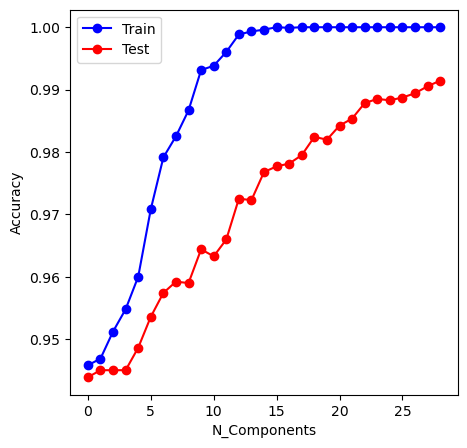

In [114]:
plt.figure(figsize=(5,5))
plt.plot(train_acc, c='blue', label='Train', marker='o')
plt.plot(test_acc, c='red', label='Test', marker='o')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('N_Components')
plt.show()